# Imports

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Functions

In [11]:
def data_sorting(folder_name):
    
    fitness = pd.DataFrame()
    age = pd.DataFrame()
    score = pd.DataFrame()
    
    data = pd.DataFrame()
    
    for i, data_dir in enumerate(os.listdir(os.path.join('data', folder_name))):

        data1 = pd.read_csv(os.path.join('data', folder_name, data_dir), header = None)
        data1.columns = ['gen', 'log']

        fitness[i] = data1.log.apply(lambda x: float(x.split(',')[0].replace('[', '')))
        age[i] = data1.log.apply(lambda x: float(x.split(',')[1]))
        score[i] = data1.log.apply(lambda x: float(x.split(',')[2].replace(']', '')))

    
    data['avg_fitness'] = fitness.mean(axis = 1)
    data['avg_age'] = age.mean(axis = 1)
    data['avg_score'] = score.mean(axis = 1)
    
    data['std_fitness'] = fitness.std(axis = 1)
    data['std_age'] = age.std(axis = 1)
    data['std_score'] = score.std(axis = 1)
    
    return data

In [29]:
def plot_features(data, std = False):
    
    if std:
        
        plt.errorbar(data.index, data.avg_score, data.std_score)
        plt.title('Avg Score over the generations with standard deviation')
        plt.xlabel('Generation')
        plt.ylabel('Avg Score')
        plt.show()

        plt.errorbar(data.index, data.avg_age, data.std_age)
        plt.title('Avg Age over the generations with standard deviation')
        plt.xlabel('Generation')
        plt.ylabel('Avg Score')
        plt.show()

        plt.errorbar(data.index, data.avg_fitness, data.std_fitness)
        plt.title('Avg Fitness over the generations with standard deviation')
        plt.xlabel('Generation')
        plt.ylabel('Avg Fitness')
        plt.show()
    
    else:
        
        plt.plot(data.index, data.avg_score)
        plt.title('Avg Score over the generations')
        plt.xlabel('Generation')
        plt.ylabel('Avg Score')
        plt.show()

        plt.plot(data.index, data.avg_age)
        plt.title('Avg Age over the generations')
        plt.xlabel('Generation')
        plt.ylabel('Avg Score')
        plt.show()

        plt.plot(data.index, data.avg_fitness)
        plt.title('Avg Fitness over the generations')
        plt.xlabel('Generation')
        plt.ylabel('Avg Fitness')
        plt.show()

In [27]:
def compare_data(folder_list, std = False):
    
    data_dict = {}
    
    for folder in folder_list:
        
        data_dict[folder.split('.')[0]] = data_sorting(folder)
    
    for data_label in data_dict.keys():
        
        if std:
            
            plt.errorbar(data_dict[data_label].index, data_dict[data_label].avg_score, xerr =  data_dict[data_label].std_score, label = data_label)
            plt.title('Avg Score over the generations with standard deviation')
            plt.xlabel('Generation')
            plt.ylabel('Avg Score')
        
        else:
        
            plt.plot(data_dict[data_label].index, data_dict[data_label].avg_score, label = data_label)
            plt.title('Avg Score over the generations')
            plt.xlabel('Generation')
            plt.ylabel('Avg Score')
    
    plt.legend(loc = 4) 
    plt.show()
    
    for data_label in data_dict.keys():
        
        if std:
            
            plt.errorbar(data_dict[data_label].index, data_dict[data_label].avg_age, yerr =  data_dict[data_label].std_age, label = data_label)
            plt.title('Avg Age over the generations with standard deviation')
            plt.xlabel('Generation')
            plt.ylabel('Avg Score')
        
        else:
        
            plt.plot(data_dict[data_label].index, data_dict[data_label].avg_age, label = data_label)
            plt.title('Avg Age over the generations')
            plt.xlabel('Generation')
            plt.ylabel('Avg Age')
    
    plt.legend(loc = 4) 
    plt.show()
    
    for data_label in data_dict.keys():
        
        if std:
            
            plt.errorbar(data_dict[data_label].index, data_dict[data_label].avg_fitness, yerr =  data_dict[data_label].std_fitness, label = data_label)
            plt.title('Avg Fitness over the generations with standard deviation')
            plt.xlabel('Generation')
            plt.ylabel('Avg Fitness')
        
        else:
        
            plt.plot(data_dict[data_label].index, data_dict[data_label].avg_fitness, label = data_label)
            plt.title('Avg Fitness over the generations')
            plt.xlabel('Generation')
            plt.ylabel('Avg Fitness')
   
    plt.legend(loc = 4) 
    plt.show()
    

# See performance of a configuration

Insert the name of the directory where the log files are stored

In [14]:
name = 'fit_funct_davide'

In [15]:
data = data_sorting(name)

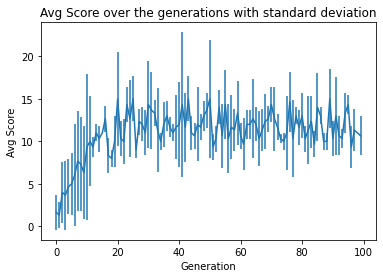

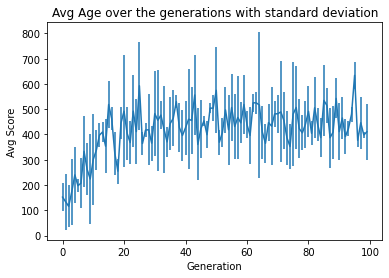

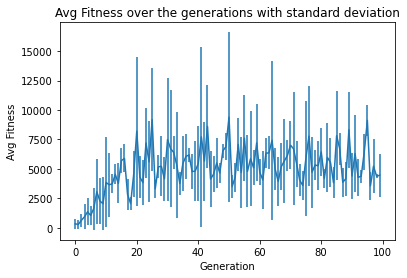

In [30]:
plot_features(data, std = True)

# Compare two configurations

The input of the function needs to be a list with the names of the folders where the logs are stored. 

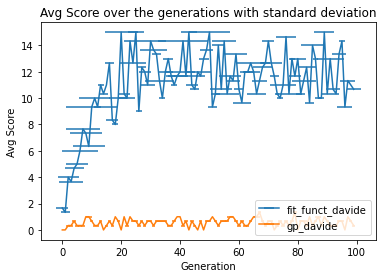

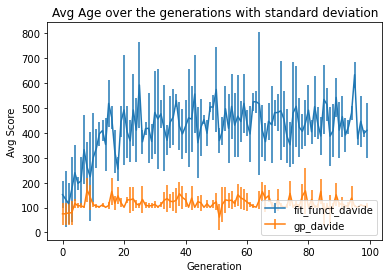

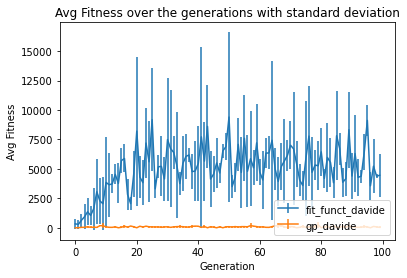

In [28]:
compare_data(['fit_funct_davide', 'gp_davide'], std = True)